In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [102]:
df = pd.read_csv('movies.csv')

In [121]:
# Checking the Data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# Checking for messing values in the Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
# Droping the rows with missing Data
df.dropna(subset=['budget', 'gross', 'runtime', 'votes'], inplace = True)

In [13]:
# Changing the Data types of columns
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['votes'] = df['votes'].astype(int)
df['runtime'] = df['runtime'].astype(int)

In [31]:
df = df.sort_values(by = ['gross'], ascending = False)

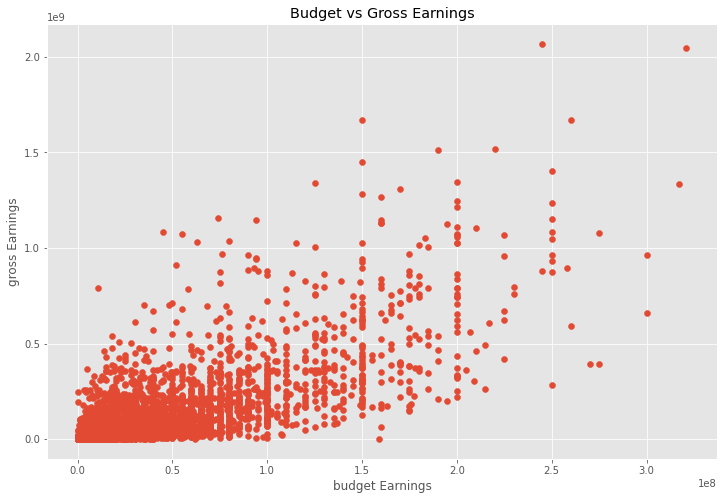

In [87]:
# Plotting gross versus budget to check visually for correlation
plt.scatter(x = df['budget'], 
            y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('budget Earnings')

plt.ylabel('gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

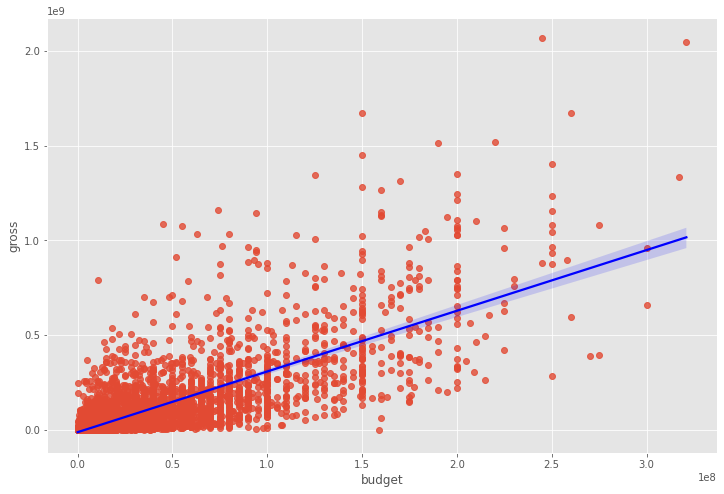

In [90]:
# Plotting budget versus gross using regration model
sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {'color':'blue'})

In [94]:
# Checking for correlation

In [95]:
# Checking for correlation between various numeric movie feauture
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.054751,0.205802,0.328245,0.283808,0.073331
score,0.054751,1.000000,0.472941,0.067165,0.221242,0.413097
votes,0.205802,0.472941,1.000000,0.432234,0.613943,0.345593
budget,0.328245,0.067165,0.432234,1.000000,0.743714,0.310979
gross,0.283808,0.221242,0.613943,0.743714,1.000000,0.261782
runtime,0.073331,0.413097,0.345593,0.310979,0.261782,1.000000


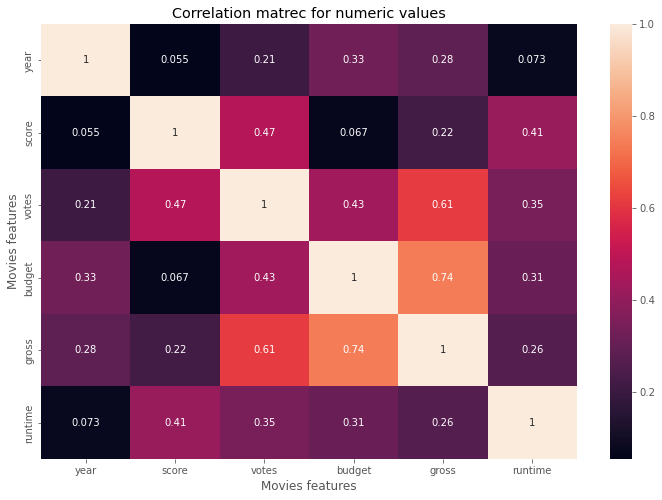

In [99]:
# Plotting the correlation in a Heatmap
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrec for numeric values')

plt.xlabel('Movies features')

plt.ylabel('Movies features')

plt.show()

In [100]:
# Assinning a numeric values to Object Data type cloumns
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,3653,5,0,2015,529,7.8,876000,770,1810,357,47,245000000,2069521700,949,138,311
7244,388,5,0,2018,145,8.4,897000,106,515,1474,47,321000000,2048359754,987,149,257
7480,4399,4,2,2019,1129,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118,142
6653,2123,5,0,2015,1306,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124,138
6043,3888,5,0,2012,1904,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2978,5,0,1993,1470,4.5,1900,1810,3111,187,47,5000000,2970,1382,97,36
3681,1597,3,6,2000,1725,6.8,43000,954,1687,528,6,5000000,2554,468,108,47
272,2918,6,9,1982,1529,3.9,2300,263,55,1477,47,800000,2270,584,85,189
2417,2399,-1,6,1993,64,7.3,5100,23,1220,1687,26,11900000,596,492,134,255


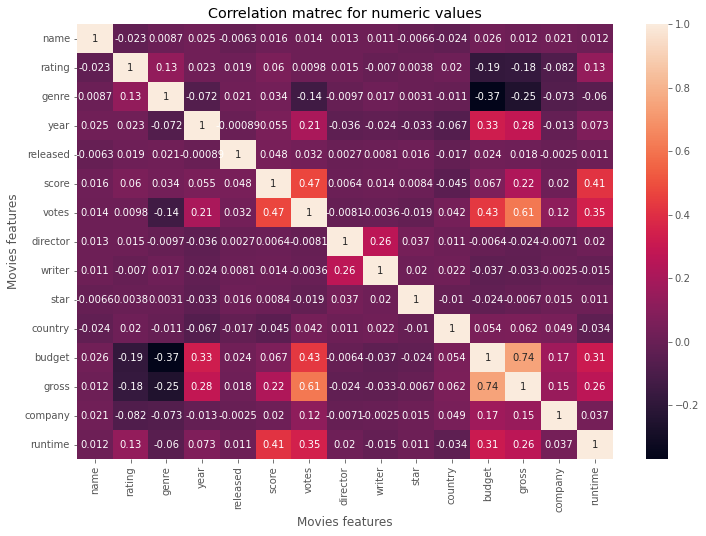

In [116]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrec for numeric values')

plt.xlabel('Movies features')

plt.ylabel('Movies features')

plt.show()

In [118]:
# Sorting the correlation between different movies features 
correlation_mat = df_numerized.corr()
correlation_pairs = correlation_mat.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget   genre     -0.370258
genre    budget    -0.370258
gross    genre     -0.253027
genre    gross     -0.253027
rating   budget    -0.188014
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [119]:
# Showing the features with highest coreelation
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross     votes       0.613943
votes     gross       0.613943
budget    gross       0.743714
gross     budget      0.743714
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [120]:
# The conclusion that came upon from this analysis is that gross and budget have high correlation and gross and votes have also high correlation